In [98]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [99]:
import six
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier
from text import create_dataframe, trn_tst, create_split_dataframe
from statistical_models import *

In [104]:
def test_model(m, test_params):
    """
    m: one of ["lg", "svm", "rf", "nb"]
    """
    max_words, p, max_lenght = 15000, 0.8, 30
    # create dataframe for train and test
    data = create_dataframe(labels, max_words=max_words)
    trn_df, tst_df = trn_tst(data, p)
    tst_df = create_split_dataframe(tst_df, max_lenght)
    x_trn, y_trn = trn_df['text'], trn_df['label']
    x_tst, y_tst = tst_df['text'], tst_df['label']
    scores = main(test_params, x_trn, x_tst, y_trn, y_tst, m=m)
#     plt.style.use("ggplot")
#     scores.mean().plot(figsize=(10, 10), kind='bar')
    print("means are {}".format(scores.mean()))
    return scores

def test_data(m, max_data=[]):

    p, max_lenght, test_params = 0.6, 10, {"char":[(1, 1), (1, 2)]}
    # create dataframe for train and test
    scores = []
    names = []
    for max_words in tqdm(max_data):
        data = create_dataframe(labels, max_words=max_words)
        trn_df, tst_df = trn_tst(data, p)
        tst_df = create_split_dataframe(tst_df, max_lenght)    
        x_trn, y_trn = trn_df['text'], trn_df['label']
        x_tst, y_tst = tst_df['text'], tst_df['label']
        tmp = main(test_params, x_trn, x_tst, y_trn, y_tst, m=m).mean()
        names += list(map(lambda r: r+"_"+str(max_words), list(tmp.index)))
        scores += tmp.tolist()
#     plt.style.use("ggplot")
#     scores.mean().plot(figsize=(10, 10), kind='bar')
#     print("means are {}".format(scores.mean()))
    return pd.DataFrame({"model":names, 'score':scores})

def test_sentence_lenghts(m, max_lenghts=[]):
    max_words, p, test_params = 10000, 0.8, {"char":[(1, 4)]}
    # create dataframe for train and test
    scores = []
    names = []
    data = create_dataframe(labels, max_words=max_words)
    trn_df, tst_df0 = trn_tst(data, p)
    x_trn, y_trn = trn_df['text'], trn_df['label']
    for max_lenght in tqdm(max_lenghts):
        tst_df = create_split_dataframe(tst_df0, max_lenght)    
        x_tst, y_tst = tst_df['text'], tst_df['label']
        tmp = main(test_params, x_trn, x_tst, y_trn, y_tst, m=m).mean()
        names += list(map(lambda r: r+"_"+str(max_lenght), list(tmp.index)))
        scores += tmp.tolist()
    return pd.DataFrame({"model":names, 'score':scores})

def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

In [78]:
SVC??

# Test Logistic Regression

In [47]:
m, test_params = "lrg", {"char":[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]}
scores = test_model(m, test_params)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 70.11it/s]


means are accuracy-score_1_char    0.784810
f1-score_1_char          0.775072
accuracy-score_2_char    0.890032
f1-score_2_char          0.888380
accuracy-score_3_char    0.915348
f1-score_3_char          0.914240
accuracy-score_4_char    0.909810
f1-score_4_char          0.910408
accuracy-score_5_char    0.904272
f1-score_5_char          0.907279
dtype: float64


In [38]:
scores

,languages,accuracy-score_1_char,f1-score_1_char,accuracy-score_2_char,f1-score_2_char,accuracy-score_3_char,f1-score_3_char,accuracy-score_4_char,f1-score_4_char,accuracy-score_5_char,f1-score_5_char
0,Bulgarian,0.756116,0.984127,0.87156,0.939394,0.891437,0.832215,0.889908,0.729412,0.879969,0.645833
1,Czech,0.756116,0.884956,0.87156,0.920354,0.891437,0.929825,0.889908,0.936937,0.879969,0.927273
2,Danish,0.756116,0.803150,0.87156,0.919355,0.891437,0.966102,0.889908,0.948276,0.879969,0.939130
3,German,0.756116,0.654088,0.87156,0.824427,0.891437,0.892562,0.889908,0.898305,0.879969,0.905983
4,Greek,0.756116,0.964912,0.87156,0.932203,0.891437,0.894309,0.889908,0.852713,0.879969,0.859375
5,English,0.756116,0.547368,0.87156,0.830508,0.891437,0.878049,0.889908,0.904762,0.879969,0.896000
6,Spanish,0.756116,0.404762,0.87156,0.807692,0.891437,0.892857,0.889908,0.902655,0.879969,0.902655
7,Estonian,0.756116,0.763359,0.87156,0.917293,0.891437,0.924242,0.889908,0.961832,0.879969,0.961832
8,Finnish,0.756116,0.808219,0.87156,0.893939,0.891437,0.921875,0.889908,0.936508,0.879969,0.936508
9,French,0.756116,0.545455,0.87156,0.782609,0.891437,0.810345,0.889908,0.814159,0.879969,0.821429


In [48]:
scores.to_pickle("./models/scores_lrg.pkl")

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 67.40it/s]


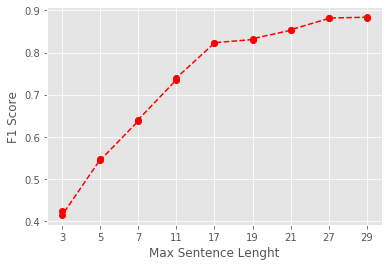

In [46]:
m, max_lenghts = "lrg", [3, 5, 7, 11, 17, 19, 21, 27, 29]

scores = test_sentence_lenghts(m, max_lenghts)

scores.to_pickle("./models/lrg_sentence_lenghts.pkl")

# scores = scores.set_index("model")

# rows = list(map(lambda r:True if "f1" in r.split("-") else False, scores.index))

# scores = scores.loc[rows]

plt.style.use("ggplot")
# plt.figure(figsize=(15, 15))
# idxs = [i for i in range(len(scores)) if i%2 != 0]
x = scores.loc[:, 'model']
x = list(map(lambda r: r.split('_')[-1], x))
# x = [x[i] for i in range(len(scores)) if i%2 != 0]
y = scores.loc[:, 'score']
# y = [y[i] for i in range(len(scores)) if i%2 != 0]

plt.plot(x, y, "ro--")
plt.xlabel("Max Sentence Lenght")
plt.ylabel("F1 Score")
plt.savefig("./models/lrg_sentence_lenghts.png")
plt.show()

In [140]:
scores

,model,score
0,f1-score_3_char_3,0.481666
1,f1-score_4_char_3,0.492417
2,f1-score_3_char_5,0.583430
3,f1-score_4_char_5,0.597277
4,f1-score_3_char_7,0.653156
5,f1-score_4_char_7,0.667193
6,f1-score_3_char_11,0.740901
7,f1-score_4_char_11,0.753042
8,f1-score_3_char_17,0.815599
9,f1-score_4_char_17,0.825686


In [49]:
# scores = pd.read_pickle("./models/scores_lrg.pkl")
scores.mean().to_csv("./models/lrg_means.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


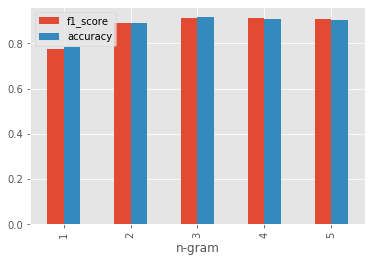

In [50]:
means = pd.read_csv("./models/lrg_means.csv")

means.plot(x="n-gram", y=["f1_score", "accuracy"], kind="bar")
plt.savefig("./models/lrg_ngram_range.png")

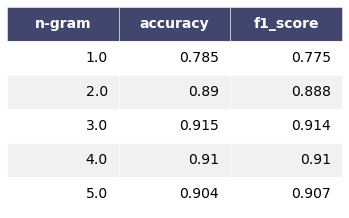

In [74]:
means = pd.read_csv("./models/lrg_means.csv")
means = means.set_index('n-gram')
means = means.reset_index()

render_mpl_table(means.round(3), header_columns=0, col_width=2.0)
plt.savefig("./models/lrg_ngram_range_table.png")

In [53]:
info = pd.read_csv('europarl_info.csv')
render_mpl_table(info, header_columns=0, col_width=2.0)
plt.savefig("./models/dataset_info.png")

FileNotFoundError: [Errno 2] File b'europarl_info.csv' does not exist: b'europarl_info.csv'

# Test NBaiyes

In [57]:
m, test_params = "nb", {"char":[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7)]}# 
scores = test_model(m, test_params)

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 72.79it/s]


means are accuracy-score_1_char    0.831637
f1-score_1_char          0.832642
accuracy-score_2_char    0.917776
f1-score_2_char          0.917483
accuracy-score_3_char    0.942052
f1-score_3_char          0.941814
accuracy-score_4_char    0.949099
f1-score_4_char          0.948834
accuracy-score_5_char    0.950666
f1-score_5_char          0.950530
accuracy-score_6_char    0.949099
f1-score_6_char          0.949004
accuracy-score_7_char    0.948316
f1-score_7_char          0.948361
dtype: float64


In [58]:
scores.to_pickle("./models/scores_nb.pkl")

In [59]:
# scores = pd.read_pickle("./models/scores_nb.pkl")

In [60]:
scores.mean().to_csv("./models/nb_means.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


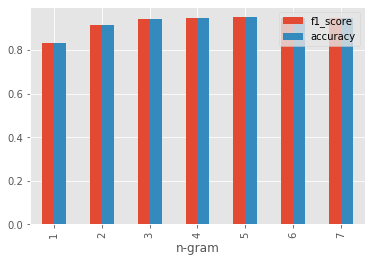

In [61]:
means = pd.read_csv("./models/nb_means.csv")

means.plot(x="n-gram", y=["f1_score", "accuracy"], kind="bar")
plt.savefig("./models/nb_ngram_range.png")

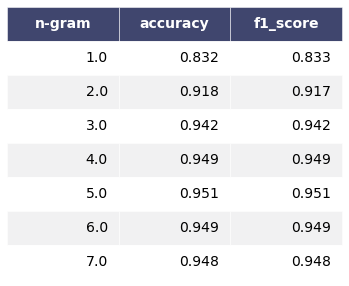

In [63]:
# means = pd.read_csv("./models/nb_means.csv")
means = means.set_index("n-gram")
means = means.reset_index()
render_mpl_table(means.round(3), header_columns=0, col_width=2.0)
plt.savefig("./models/nb_ngram_range_table.png")

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 71.72it/s]


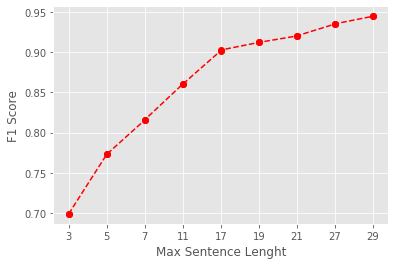

In [65]:
m, max_lenghts = "nb", [3, 5, 7, 11, 17, 19, 21, 27, 29]

scores = test_sentence_lenghts(m, max_lenghts)

scores.to_pickle("./models/nb_sentence_lenghts.pkl")

plt.style.use("ggplot")
# plt.figure(figsize=(15, 15))
# idxs = [i for i in range(len(scores)) if i%2 != 0]
x = scores.loc[:, 'model']
x = list(map(lambda r: r.split('_')[-1], x))
# x = [x[i] for i in range(len(scores)) if i%2 != 0]
y = scores.loc[:, 'score']
# y = [y[i] for i in range(len(scores)) if i%2 != 0]

plt.plot(x, y, "ro--")
plt.xlabel("Max Sentence Lenght")
plt.ylabel("F1 Score")
plt.savefig("./models/nb_sentence_lenghts.png")
plt.show()

# Test SVM

In [84]:
# SVC??

In [106]:
m, test_params = "svm", {"char":[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5)]}# 
scores = test_model(m, test_params)

In [69]:
scores.to_pickle("./models/scores_svm.pkl")

In [70]:
# scores = pd.read_pickle("./models/scores_svm.pkl")

scores.mean().to_csv("./models/svm_means.csv")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


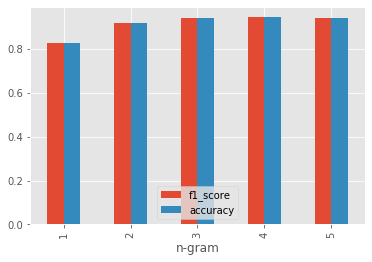

In [72]:
plt.style.use('ggplot')
means = pd.read_csv("./models/svm_means.csv")

means.plot(x="n-gram", y=["f1_score", "accuracy"], kind="bar")
plt.savefig("./models/svm_ngram_range.png")

100%|██████████████████████████████████████████████████████████████████████████████████| 21/21 [00:00<00:00, 46.96it/s]


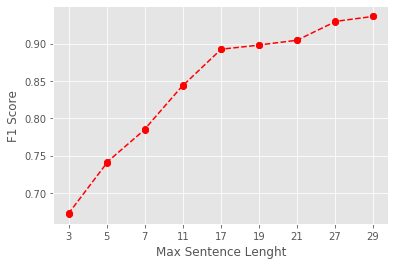

In [107]:
m, max_lenghts = "svm", [3, 5, 7, 11, 17, 19, 21, 27, 29]

scores = test_sentence_lenghts(m, max_lenghts)

scores.to_pickle("./models/svm_sentence_lenghts.pkl")

plt.style.use("ggplot")
# plt.figure(figsize=(15, 15))
# idxs = [i for i in range(len(scores)) if i%2 != 0]
x = scores.loc[:, 'model']
x = list(map(lambda r: r.split('_')[-1], x))
# x = [x[i] for i in range(len(scores)) if i%2 != 0]
y = scores.loc[:, 'score']
# y = [y[i] for i in range(len(scores)) if i%2 != 0]

plt.plot(x, y, "ro--")
plt.xlabel("Max Sentence Lenght")
plt.ylabel("F1 Score")
plt.savefig("./models/svm_sentence_lenghts.png")
plt.show()

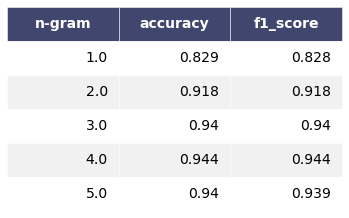

In [73]:
means = pd.read_csv("./models/svm_means.csv")
means = means.set_index("n-gram")
means = means.reset_index()
render_mpl_table(means.round(3), header_columns=0, col_width=2.0)
plt.savefig("./models/svm_ngram_range_table.png")